#### Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

#### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification problem i.e whether a loan would be approved or not...

#### Dataset Description

Loan_ID Unique Loan ID

Gender Male/ Female

Married Applicant married (Y/N)

Dependents Number of dependents

Education Applicant Education (Graduate/ Under Graduate)

Self_Employed Self employed (Y/N)

ApplicantIncome Applicant income

CoapplicantIncome Coapplicant income

LoanAmount Loan amount in thousands

Loan_Amount_Term Term of loan in months

Credit_History credit history meets guidelines

Property_Area Urban/ Semi Urban/ Rural

Loan_Status (Target) Loan approved (Y/N)

### Import Modules

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [121]:
df = pd.read_csv("D:\Datasets\Dream Housing Finance Company\Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Preprocessing of data

In [124]:
# Find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
#Fill the missing values for numerical terms using mean
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].mean())

In [126]:
# Fill the missing values for cat vaerms with mode
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [127]:
df["Married"].mode()

0    Yes
Name: Married, dtype: object

In [128]:
df["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [129]:
df["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [130]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


In [131]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA

<Axes: xlabel='Gender', ylabel='count'>

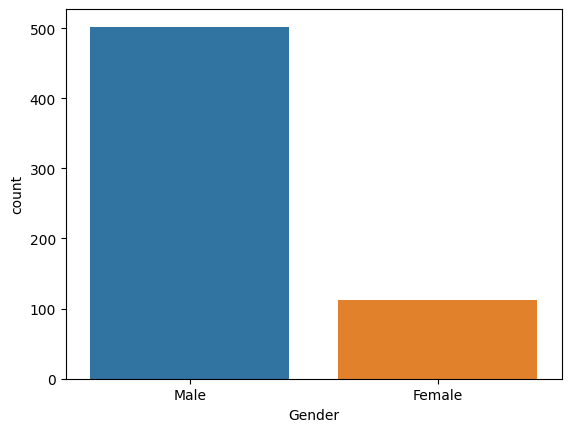

In [132]:
#Categorical Attributes Visualisation
sns.countplot(x = df["Gender"])

<Axes: xlabel='Married', ylabel='count'>

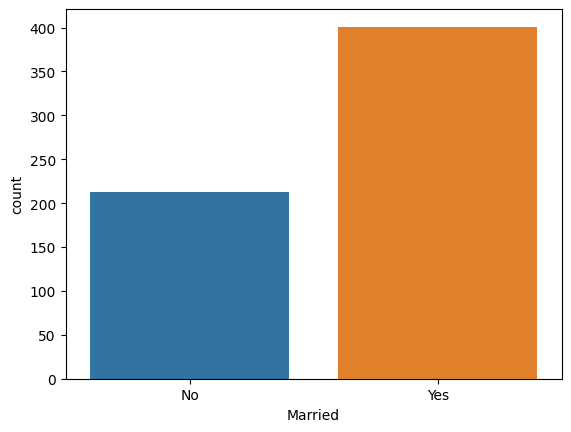

In [133]:
sns.countplot(x = df["Married"])

<Axes: xlabel='Dependents', ylabel='count'>

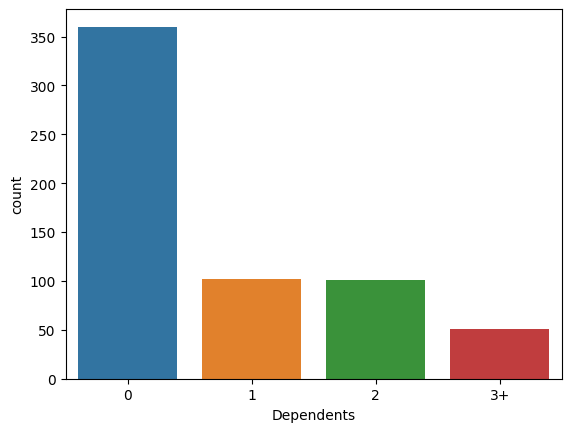

In [134]:
sns.countplot(x = df["Dependents"])

<Axes: xlabel='Education', ylabel='count'>

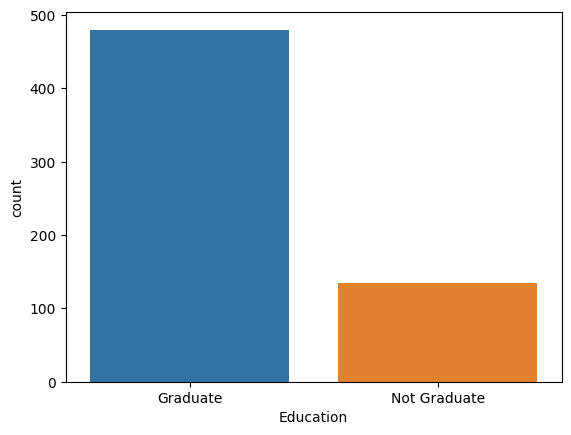

In [135]:
sns.countplot(x = df["Education"])

<Axes: xlabel='Self_Employed', ylabel='count'>

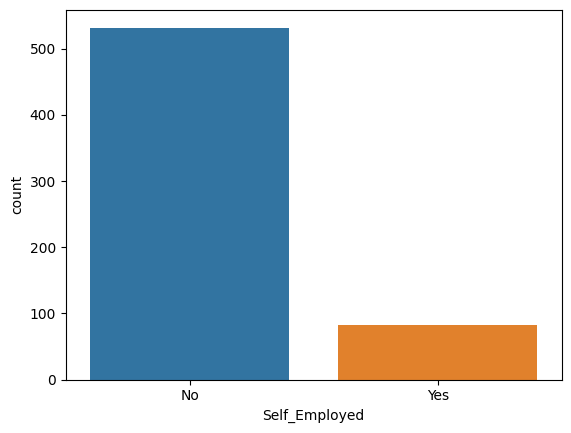

In [136]:
sns.countplot(x = df["Self_Employed"])

<Axes: xlabel='Property_Area', ylabel='count'>

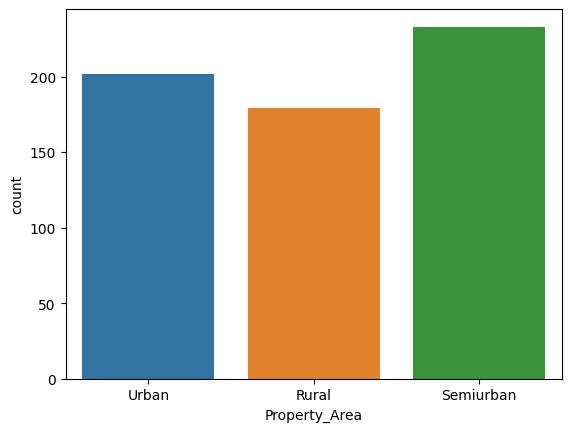

In [137]:
sns.countplot(x = df["Property_Area"])

<Axes: xlabel='Loan_Status', ylabel='count'>

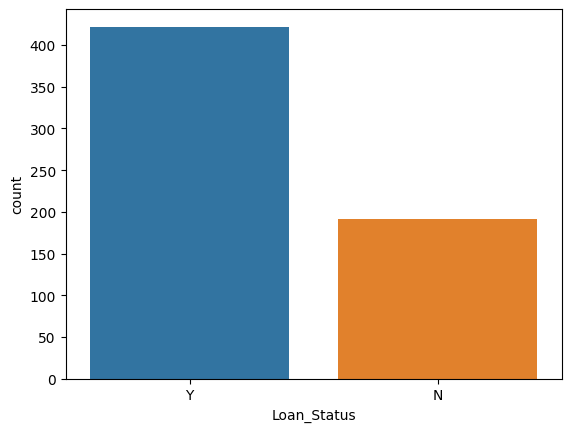

In [138]:
sns.countplot(x = df["Loan_Status"])

### Creation of new attributes

In [139]:
#Always create new attributes before standardisation
#EMI and Total income can be created
df["Total_Income"] = df["CoapplicantIncome"] + df["ApplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

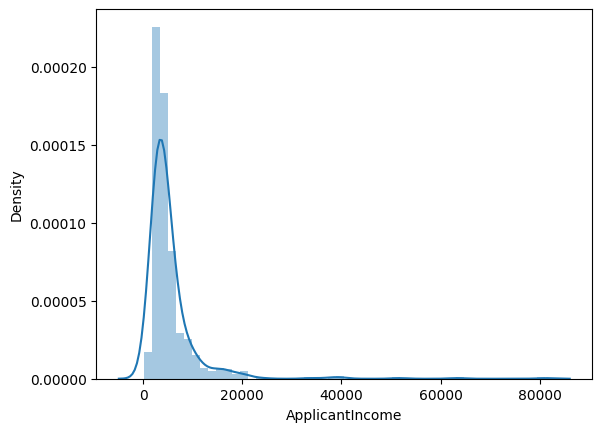

In [140]:
#Numerical Attributes Visualisation
sns.distplot(df["ApplicantIncome"])


Seems like left skewed distribution...not a suitable distribution to train the model

So we apply log transformation function to normalise

In [141]:
df["ApplicantIncomeLog"] = np.log(df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

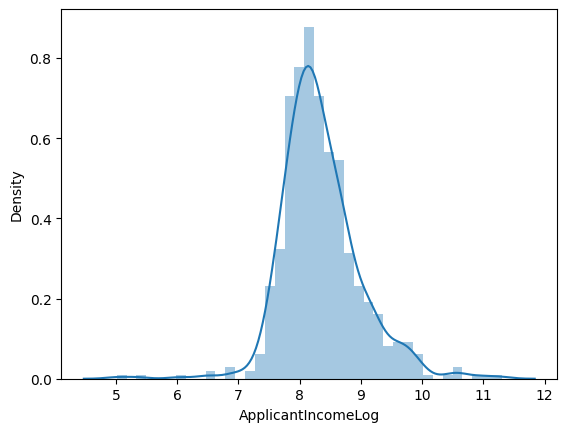

In [142]:
sns.distplot(df["ApplicantIncomeLog"])


Good distribution to train

In case of left or right skewed data use either log function or Mean max normalisation or standardisation

In [143]:
df["CoapplicantIncome"]

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

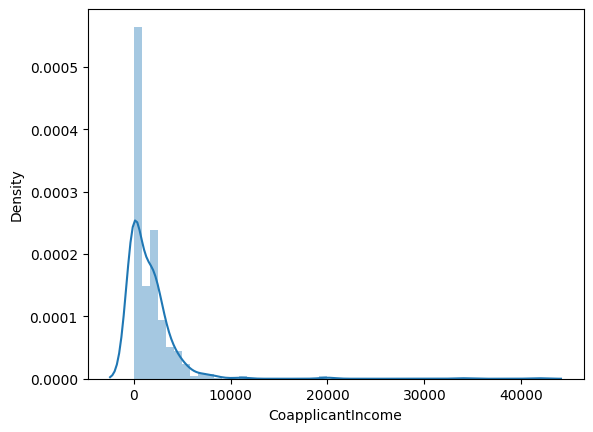

In [144]:
sns.distplot(df["CoapplicantIncome"])

ValueError: cannot convert float NaN to integer

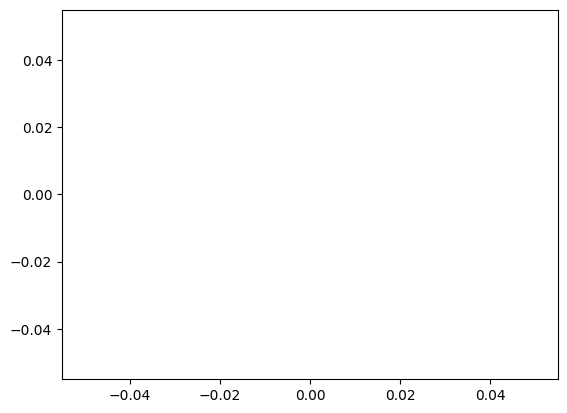

In [145]:
df["CoapplicantIncomeLog"] = np.log(df["CoapplicantIncome"])
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

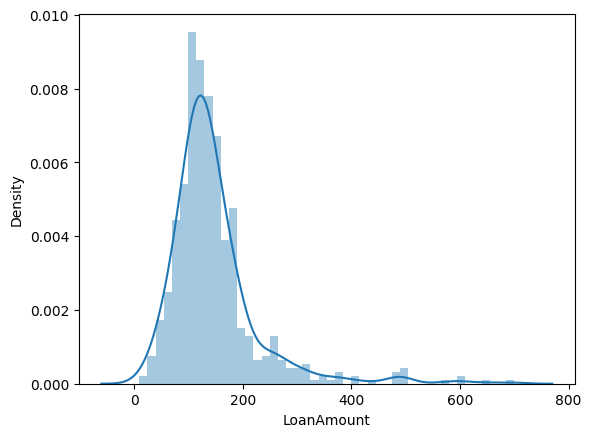

In [146]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

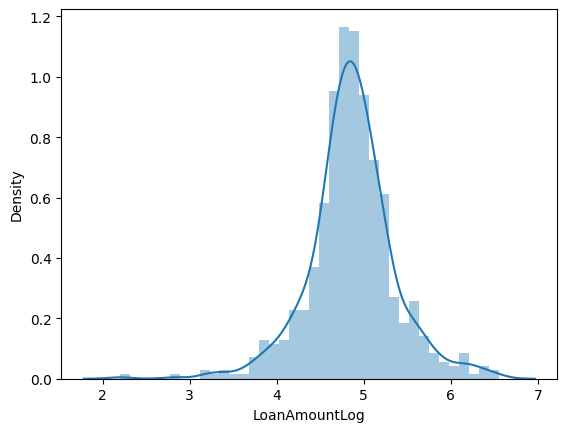

In [147]:
df["LoanAmountLog"] = np.log(df["LoanAmount"])
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

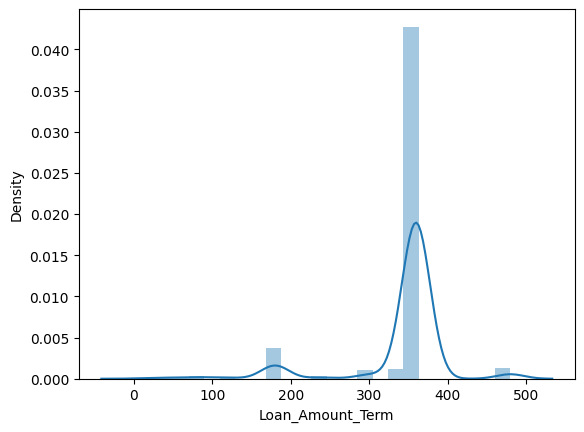

In [148]:
sns.distplot(df["Loan_Amount_Term"])

<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

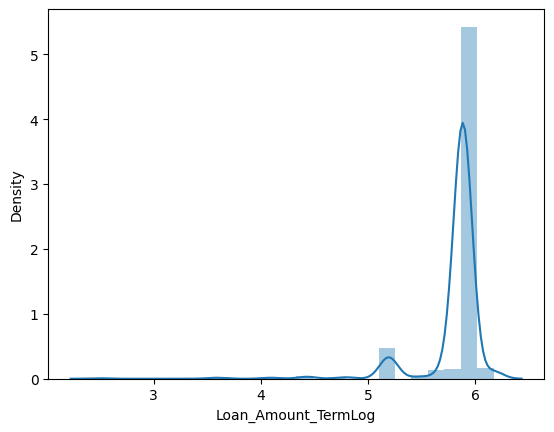

In [149]:
df["Loan_Amount_TermLog"] = np.log(df["Loan_Amount_Term"])
sns.distplot(df["Loan_Amount_TermLog"])

<Axes: xlabel='Credit_History', ylabel='Density'>

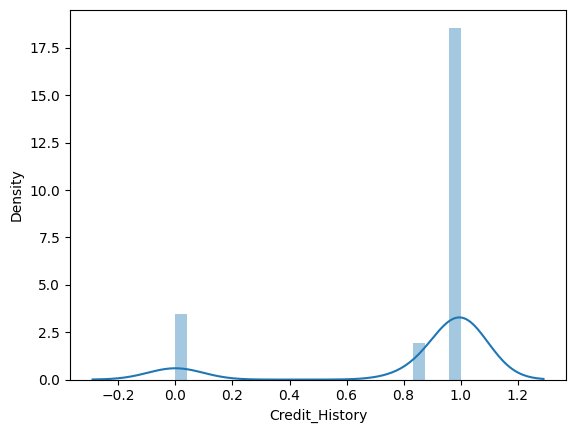

In [150]:
sns.distplot(df["Credit_History"])

As the values are between 0 to 1 it wont be much useful

<Axes: xlabel='Total_Income', ylabel='Density'>

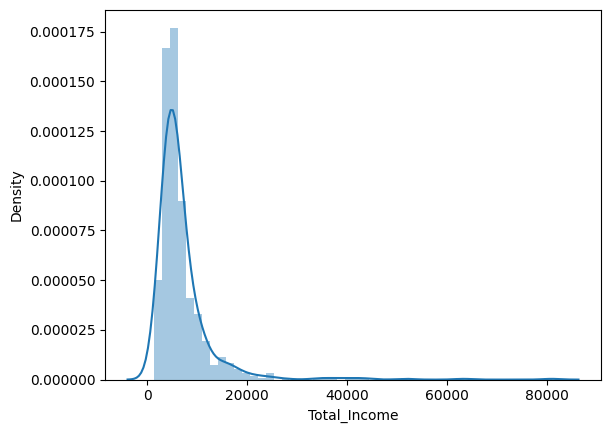

In [151]:
sns.distplot(df["Total_Income"])

<Axes: xlabel='Total_Income', ylabel='Density'>

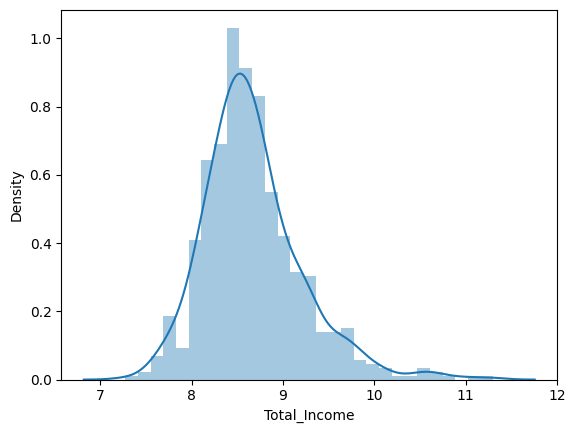

In [152]:
df["Total_Income"] = np.log(df["Total_Income"])
sns.distplot(df["Total_Income"])

### Correlation Matrix

<Axes: >

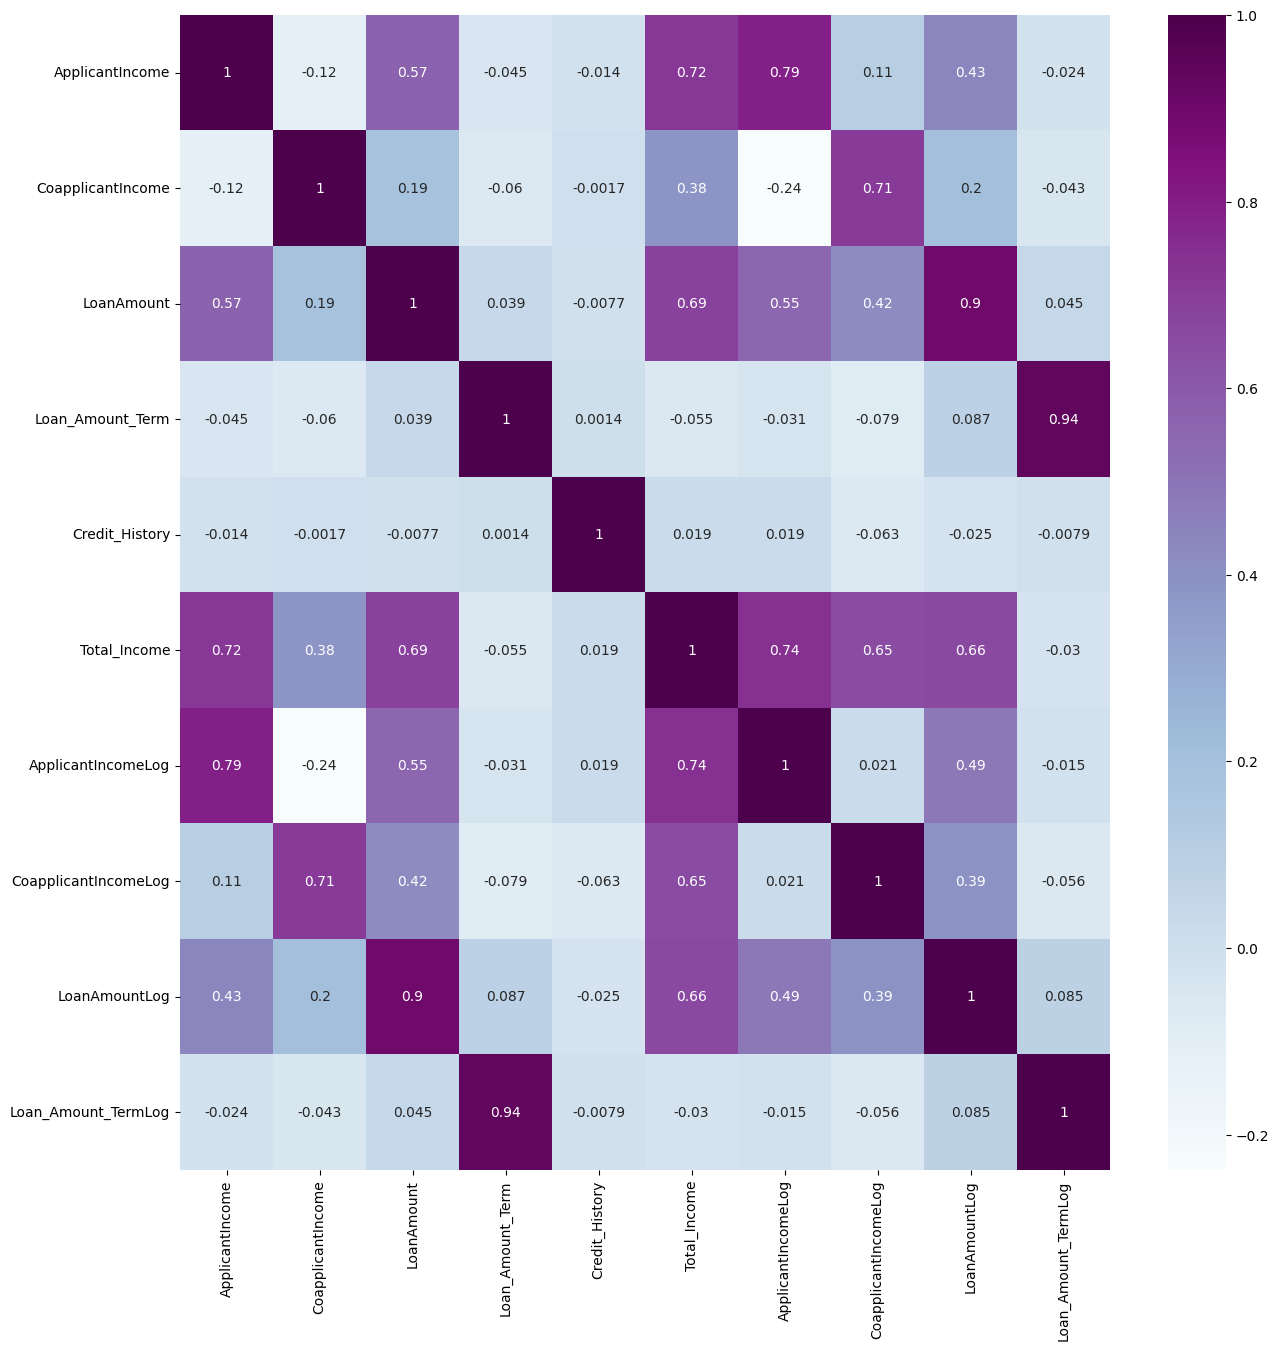

In [153]:
#Correlation for the numerical attributes
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True, cmap = "BuPu")

In [154]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,8.674026,-inf,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,8.505323,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,8.699515,-inf,4.948760,5.886104


In [155]:
#Remove original terms and keep log terms for training the model
#drop unnecessary columns
cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_Income","Loan_ID","CoapplicantIncome","CoapplicantIncomeLog"]

In [156]:
df = df.drop(columns = cols, axis =1)#axis = 1 to drop columnwise entirely
df


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,4.262680,5.886104
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,3.688879,5.192957
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,5.533389,5.886104
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,5.231109,5.886104


### Label Encoding

In [162]:
#Convert categorical to numerical attributes in order to train the model
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [163]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104


### Train-Test Split

In [164]:
x = df.drop(columns = ["Loan_Status"],axis = 1)
y = df["Loan_Status"]

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
#42 --> common attribute like seeding

### Model Training

Cross Validation is performed for better validation of model..better version of accuracy i.e overall performance of the model

It splits the dataset into multiple parts eg if cross validation is 5 it splits into 5 parts and for each iteration, for training it uses 4 and for testing it uses 1. 

Like that it shuffles the dataset and do it for 5 times. CV = 3 or 5 is most commonly used..

In [166]:
# Classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is ",model.score(x_test, y_test)*100)
#cross validation is next performed 
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ",np.mean(score)*100)

In [168]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x, y)

Accuracy is  77.27272727272727
Cross Validation is  80.9462881514061


In [170]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is  73.37662337662337
Cross Validation is  71.50473144075703


Somewhat poor performance for decision tree classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is  77.27272727272727
Cross Validation is  79.31893909103024


Better performance compared to Decision Tree

In [172]:
model = ExtraTreesClassifier()
classify(model,x, y)

Accuracy is  75.32467532467533
Cross Validation is  75.74037051845927


In this case, poor than Random Forest

Out of all the models, we got better performance for Logistic Regression. 

Performance can be further improved changing hyperparameters

### Hyperparameter Tuning

In [173]:
model = RandomForestClassifier(n_estimators=25,min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is  75.97402597402598
Cross Validation is  79.15233906437426


In [174]:
model = RandomForestClassifier(n_estimators=50,min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is  76.62337662337663
Cross Validation is  80.61975209916034


In [175]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is  77.27272727272727
Cross Validation is  80.29454884712783


Can randomly change parameters to improve CV. In extreme cases we use GridSearch and RandomSearch as it's time consuming as it validates with so many combination of data.

### Confusion Matrix

It is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [176]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [177]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[25, 29],
       [ 4, 96]], dtype=int64)

<Axes: >

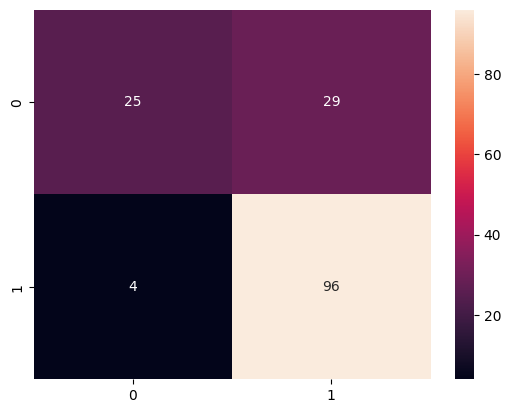

In [178]:
sns.heatmap(cm, annot=True)